## P1ZZA PLACE SALES

In [32]:
# Importing libraries
import pandas as pd  #for data manipulation
import numpy as np   #for numerical analysis
import matplotlib.pyplot as plt # data visualisation
import zipfile  # to extract the data set


In [33]:
# Extract the zip file
with zipfile.ZipFile("Pizza+Place+Sales.zip", 'r') as zip_ref:
    zip_ref.extractall()

print("Extraction DONE!")


Extraction DONE!


In [34]:
"pizza_data"

'pizza_data'

In [35]:
# Loading datasets
orders = pd.read_csv("pizza_data/pizza_sales/orders.csv",encoding="latin1")
order_details = pd.read_csv("pizza_data/pizza_sales/order_details.csv",encoding="latin1")
pizzas = pd.read_csv("pizza_data/pizza_sales/pizzas.csv",encoding="latin1")
pizza_types = pd.read_csv("pizza_data/pizza_sales/pizza_types.csv",encoding="latin1")

# Display first few rows
orders.head()


,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


## Joining all the data sets together for easy analysis and manipulation

In [36]:
# Merge all datasets into one dataframe
df = order_details.merge(pizzas, on="pizza_id") \
                  .merge(pizza_types, on="pizza_type_id") \
                  .merge(orders, on="order_id")

df.head()


,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,date,time
0,1,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-01,11:38:36
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",2015-01-01,11:57:40
2,3,2,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",2015-01-01,11:57:40
3,4,2,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",2015-01-01,11:57:40
4,5,2,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2015-01-01,11:57:40


## Creating the total price column

In [37]:
# Create total price column
df["total_price"] = df["quantity"] * df["price"]

df.head()


,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,date,time,total_price
0,1,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-01,11:38:36,13.25
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",2015-01-01,11:57:40,16.00
2,3,2,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",2015-01-01,11:57:40,18.50
3,4,2,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",2015-01-01,11:57:40,20.75
4,5,2,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2015-01-01,11:57:40,16.00


## Total Revenue Of Pizza sales generated over the year is $817,860.05.

In [38]:
# Calculating total revenue
total_revenue = df["total_price"].sum()
total_revenue


np.float64(817860.0499999999)

## Total quantity of Pizza sold throughout the year is 49,574

In [39]:
total_quantity = df["quantity"].sum()
total_quantity


np.int64(49574)

## Total Orders For Pizza were 21,350  placed by customers, which infer that each order contained an average of roughly 2.3 pizzas.

In [40]:
total_orders = df["order_id"].nunique()
total_orders


21350

## Total Pizza types offered is 32 distinct types of pizzas 


In [41]:
df["name"].nunique()


32

## The average price of a pizza on the menu (across all sizes and types) is $16.49.

In [42]:
average_price = df["price"].mean()
average_price


np.float64(16.494132044426163)

## Peak hours of Pizza sales : The ultimate peak hours are during the lunch rush, specifically 12:00 PM ($111,878 in sales) and 1:00 PM ($106,066 in sales). There is a secondary, slightly smaller surge during dinner hours around 5:00 PM to 6:00 PM.

In [43]:
df["hour"] = pd.to_datetime(df["time"]).dt.hour

sales_by_hour = df.groupby("hour")["total_price"].sum()

sales_by_hour.sort_values(ascending=False).head()


C:\Users\user\AppData\Local\Temp\ipykernel_9596\1587220002.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["hour"] = pd.to_datetime(df["time"]).dt.hour


hour
12    111877.90
13    106065.70
18     89296.85
17     86237.45
19     72628.90
Name: total_price, dtype: float64

## Data Visualisation for Peak hours of Pizza sales

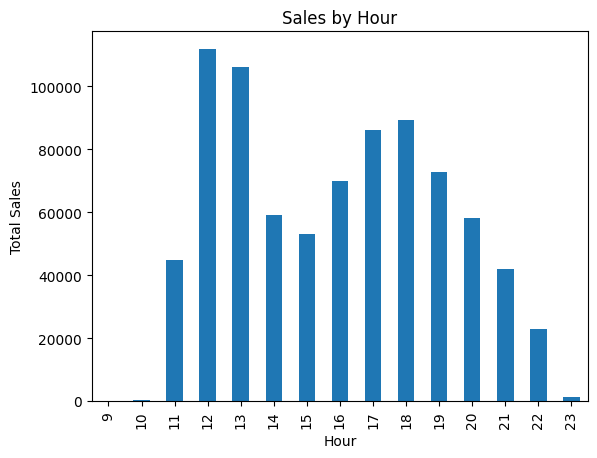

In [44]:
sales_by_hour.plot(kind="bar")
plt.title("Sales by Hour")
plt.xlabel("Hour")
plt.ylabel("Total Sales")
plt.show()


## Friday sees the most traffic with sales up to $136,073.90 ,this is closely followed by Thursday $123,528.50 .Saturday generates $123,182.40 while Sunday is the least with $99,203.50

In [45]:
df["date"] = pd.to_datetime(df["date"])
df["day_of_week"] = df["date"].dt.day_name()

sales_by_day = df.groupby("day_of_week")["total_price"].sum()
sales_by_day.sort_values(ascending=False)


day_of_week
Friday       136073.90
Thursday     123528.50
Saturday     123182.40
Wednesday    114408.40
Tuesday      114133.80
Monday       107329.55
Sunday        99203.50
Name: total_price, dtype: float64

## Data Visualisation for Daily Pizza Sales

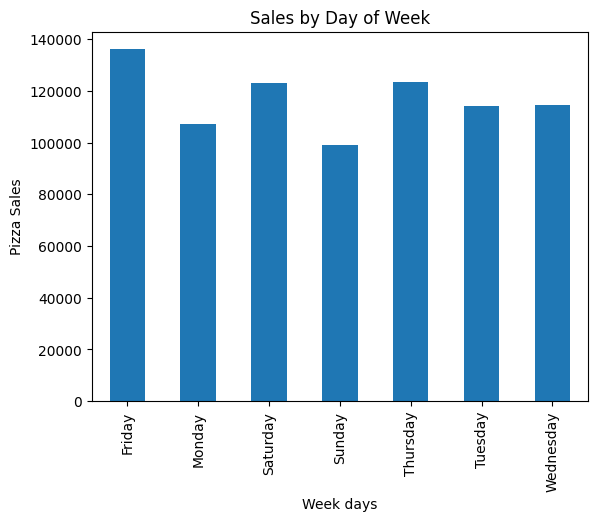

In [46]:
sales_by_day.plot(kind="bar")
plt.title("Sales by Day of Week")
plt.xlabel("Week days")
plt.ylabel("Pizza Sales")
plt.show()


## Top 5 best selling Pizza

In [47]:
top_5 = df.groupby("name")["quantity"].sum().sort_values(ascending=False).head(5)
top_5


name
The Classic Deluxe Pizza      2453
The Barbecue Chicken Pizza    2432
The Hawaiian Pizza            2422
The Pepperoni Pizza           2418
The Thai Chicken Pizza        2371
Name: quantity, dtype: int64

## Total monthly Pizza Sales :Sales are relatively stable throughout the entire year, averaging around $68,000 per month. July is the highest-grossing month ($72,557.90), followed closely by May ($71,402.75). Sales dip slightly in the autumn, with October ($64,027.60) and September ($64,180.05) being the slowest months. Overall, there is no massive seasonal drop-off, indicating steady year-round demand.

In [48]:
df["month"] = df["date"].dt.month_name()

monthly_sales = df.groupby("month")["total_price"].sum()
monthly_sales


month
April        68736.80
August       68278.25
December     64701.15
February     65159.60
January      69793.30
July         72557.90
June         68230.20
March        70397.10
May          71402.75
November     70395.35
October      64027.60
September    64180.05
Name: total_price, dtype: float64

## Data Visualisation for monthly Pizza Sales

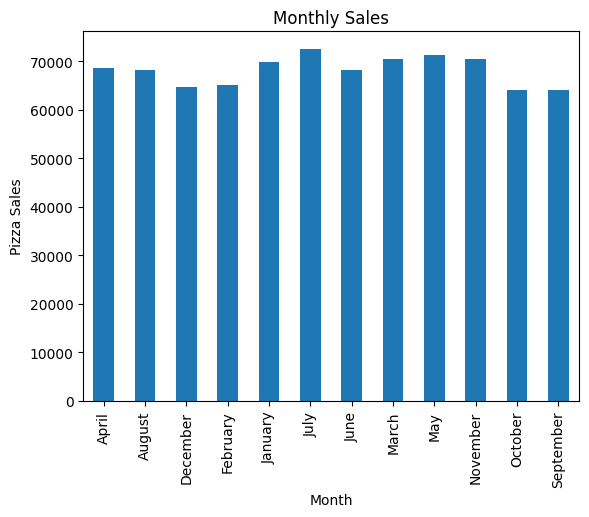

In [49]:
monthly_sales.plot(kind="bar")
plt.title("Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Pizza Sales")
plt.show()


## The most unpopular Pizza on the restaurant's menu is the Brie Carre.The recipe can the improved on if not it should be replaced with something as it does not generate as much revenue as the owner of the restaurant will want.

In [50]:
## Underperforming Pizza types
bottom_5 = df.groupby('name')['quantity'].sum().sort_values(ascending=True).head(5)
bottom_5

name
The Brie Carre Pizza         490
The Mediterranean Pizza      934
The Calabrese Pizza          937
The Spinach Supreme Pizza    950
The Soppressata Pizza        961
Name: quantity, dtype: int64

## Data Visualisation of the Pizza Sales Performance

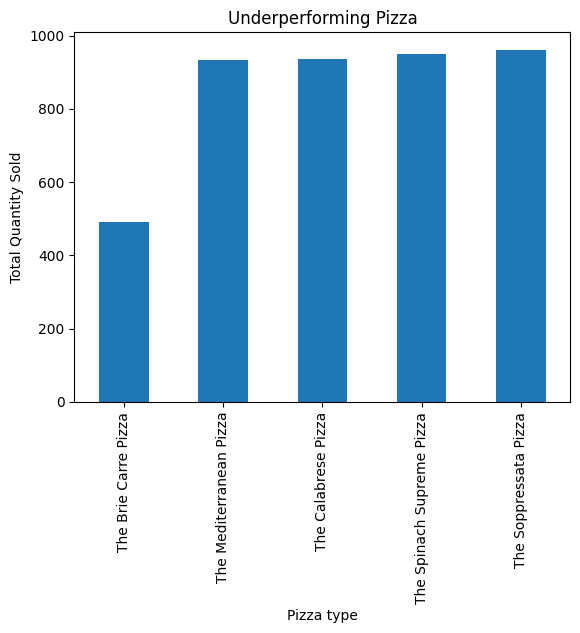

In [51]:
bottom_5.plot(kind="bar")
plt.title("Underperforming Pizza")
plt.xlabel("Pizza type")
plt.ylabel("Total Quantity Sold")
plt.show()